In [1]:
import numpy as np
import matplotlib.pyplot as plt

########## BASIC STEPS INVOLVED ARE: ###########
#Initial guess for state estimates with mean:m_0 and covariance:P_0  
# Start LOOP :
#          set up the STATE PROPOGATION/TRANSITION EQUATION =>   x(k) = F * x(k-1) + v_n
#          set up the MEASURMENT EQUATION =>                     y(k) = H * x(k) + w_n
#          start two part prediction step:
#                                       Predicted Mean =>        m_p(k) = F * m(k-1)
#                                       Predicted Covariance=>   P_p(k) = ( F * P(k-1) * F' ) + Q
#          start four part updation step:  
#                                       Intermediate Step=>      S = ( H * P_p(k) * H' ) + R
#                                       Kalman Gain=>            K(k) = P_p(k) * H' * inverse(S)
#                                       Updated Mean=>           m(k) = m_p(k) + K(k) * { y(k) - H * m_p(k) }
#                                       Updated Covariance=>     P(k) = P_p(k) - K(k) * { H * P_p(k) }
# End LOOP :
################################################


N = 100         #Number of iterations to be performed
n = 2           #Dimension of state space (2 in this case)
###############SET UP INITIAL GUESS FOR ESTIMATES#######################
m = np.zeros((n,N))     # Create an empty array for storing estimated state values of size n x N
m[:,0] = np.array([1,1])  # Initial guess for mean (1-D vector of n elements)
P_0 = np.eye(2)           # Initial guess for Covariance (n x n Symmetric Positive Semi-definite Matrix)

##############SET UP STATE TRANSITION MATRIX########################
delta_t = 0.5
F = np.array([[1, delta_t], [0, 1]]) #State Transition Matrix (n x n)
x = np.zeros((n,N))     # Create an empty array for storing propogated state values of size n x N
x[:,0] = np.array([1,1])  # Initial condition for states (1-D vector of n elements)
#######################################
sigma_x = 0.1
# Q = State Noise Covariance Matrix
Q = (sigma_x**2) * np.array([[(1/3 * (delta_t**3)), (1/2 * (delta_t**2))], [(1/2 * (delta_t**2)), delta_t]])
mean_v = [0,0]   #mean of error in state due to noise in process(state)

###############SET UP MEASURMENT MATRIX#######################
H = np.eye(2)              #Measurement Matrix
########################################
sigma_y = 0.1
# R = Measurment Noise Covariance Matrix
R = (sigma_y**2) * np.eye(2)
mean_w = [0,0]   #mean of error in measurment due to noise in sensor(measurment)
########################################


for k in range(1,N):
    
    #########State Propogation###################
    #v_n = random sample drawn from a gaussian distribution with given mean and covariance Q
    v_n = np.random.multivariate_normal(mean_v, Q) 
    #x(k) = F * x(k-1) + v_n
    x[:,k] = np.dot(F,x[:,k-1]) + v_n   
    
    #########State Measurment###################
    #v_n = random sample drawn from a gaussian distribution with given mean and covariance R
    w_n = np.random.multivariate_normal(mean_w, R)
    #y(k) = H * x(k) + w_n
    y_k = np.dot(H,x[:,k]) + w_n
    
    #########State Prediction###################
    #m_p(k) = F * m(k-1)
    m_predicted = np.dot(F,m[:,k-1])
    #P_p(k) = ( F * P(k-1) * F' ) + Q
    P_predicted = np.dot(np.dot(F,P_0),np.transpose(F)) + Q
    
    #########State Updation###################
    #S = ( H * P_p(k) * H' ) + R
    S = np.dot(np.dot(H,P_predicted),np.transpose(H)) + R
    #K(k) = P_p(k) * H' * inverse(S)
    K = np.dot(np.dot(P_predicted,np.transpose(H)),np.linalg.inv(S))
    #m(k) = m_p(k) + K(k) * {y(k) - H * m_p(k)}
    m[:,k] = m_predicted + np.dot(K, (y_k - np.dot(H,m_predicted)))
    #P(k) = P_p(k) - K(k) * H * P_p(k)
    P = P_predicted - np.dot(np.dot(K,H) ,P_predicted)
    P_0 = P #carry over the current Covariance Matrix to next iteration
    
    
    






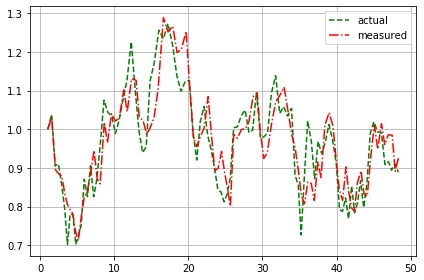

In [2]:
plt.plot(x[0,:], x[1,:], 'g--', label = 'actual' )
plt.plot(m[0,:], m[1,:], 'r-.', label = 'measured' )
plt.legend()
plt.tight_layout()   #Improve plot quality
plt.grid(True)       #Display Grids
plt.show()

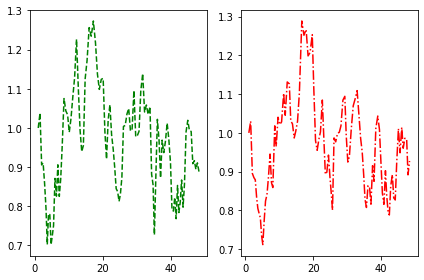

In [3]:
fig,((ax1),(ax2)) = plt.subplots(nrows = 1, ncols=2)

ax1.plot(x[0,:], x[1,:], 'g--')  
ax2.plot(m[0,:], m[1,:], 'r-.')
plt.tight_layout()  
plt.show()
